# Intalação dos pacotes

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import pairwise_distances

In [2]:
def print_cluster_info(c, number, x_lim = (0,1)):
    grupo = pd.DataFrame({'topic':dfc_sc.columns, 'value': centers[c]}).sort_values(by='value')
    fig, ax = plt.subplots(figsize=(4,2))
    grupo.plot(kind='barh', x='topic', y='value', legend = False, ax =ax, color='red')
    ax.set_xlabel('Relevância para o grupo')
    ax.set_ylabel('Tópicos')
    ax.set_title('Tópicos relevantes para o grupo '+str(c)+' que possui '+str(number[c])+" elementos")
    ax.set_xlim(x_lim)

In [3]:
def cluster_quality(df, centers, cluster):
    temp = df[df['label'] == cluster]
    temp = temp.drop(columns=['label'])
    dist = pairwise_distances(temp, centers[cluster].reshape(1, -1))
    return cluster, np.mean(dist), np.std(dist)

# Leitura dos dados e análise descritiva

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_54f99bbd676b46c1863f92dc98593d22 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_54f99bbd676b46c1863f92dc98593d22.get_object(Bucket='',Key='shopping-data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.shape

(200, 5)

Text(0.5, 1.0, 'Quantidade de usuários por sexo')

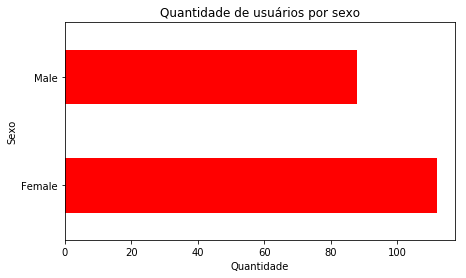

In [7]:
fig, ax = plt.subplots(figsize=(7,4))
df['Genre'].value_counts().plot(kind='barh', legend = False, ax=ax, color='red')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Sexo')
ax.set_title('Quantidade de usuários por sexo')

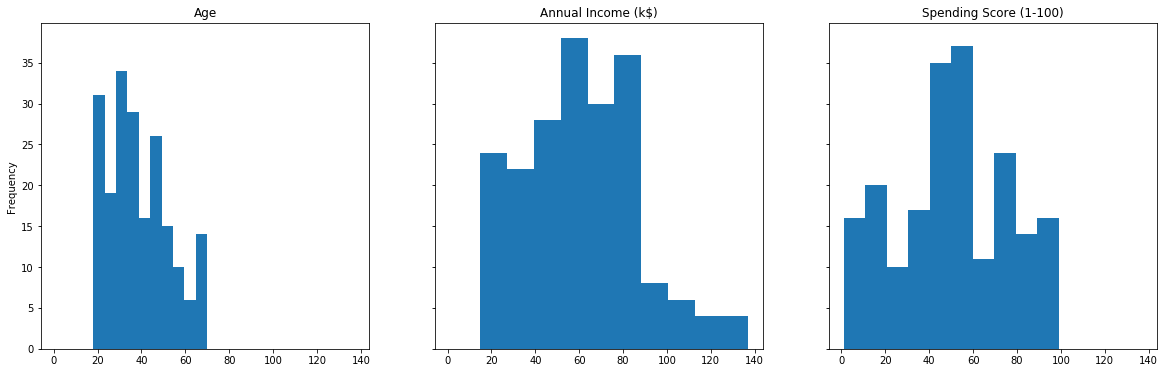

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(20,6))
df['Age'].plot(kind='hist', ax=ax1, title='Age')
df['Annual Income (k$)'].plot(kind='hist', ax=ax2, title='Annual Income (k$)')
df['Spending Score (1-100)'].plot(kind='hist', ax=ax3, title='Spending Score (1-100)')

# Pré-processamento

Vamos agrupar os clientes levando-se em consideração apenas Age, Annual Income (k$) e Spending Score (1-100).

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
dfc = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [11]:
dfc.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#min_max_scaler.fit(dfc)
#dfc_sc = pd.DataFrame(min_max_scaler.transform(dfc))
#dfc_sc.columns = dfc.columns

from sklearn.preprocessing import scale
dfc_sc = pd.DataFrame(scale(dfc))
dfc_sc.columns = dfc.columns

In [13]:
dfc_sc.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


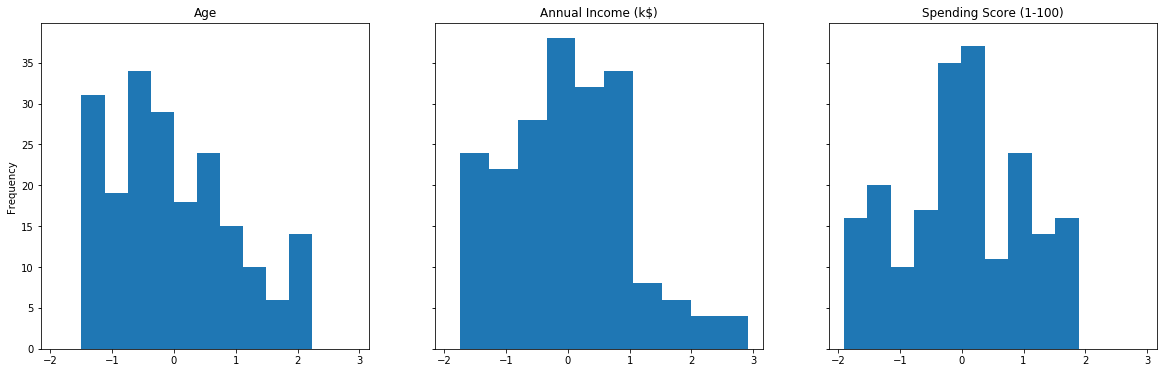

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(20,6))
dfc_sc['Age'].plot(kind='hist', ax=ax1, title='Age')
dfc_sc['Annual Income (k$)'].plot(kind='hist', ax=ax2, title='Annual Income (k$)')
dfc_sc['Spending Score (1-100)'].plot(kind='hist', ax=ax3, title='Spending Score (1-100)')

# Modelagem

In [15]:
from sklearn.cluster import KMeans
result = pd.DataFrame(columns=['k','inertia','diff'])
anterior = 0
for k in range(1,20):
    k_means = KMeans(n_clusters=k, n_init=100)
    k_means.fit(dfc_sc)
    result = result.append({'k': k, 'inertia': k_means.inertia_, 'diff': (anterior - k_means.inertia_)}, ignore_index=True)
    anterior = k_means.inertia_

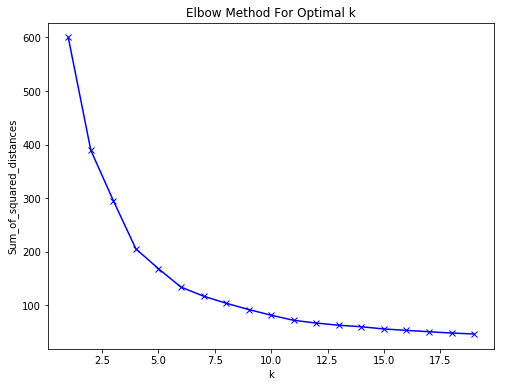

In [16]:
plt.subplots(figsize=(8,6))
plt.plot(result['k'], result['inertia'], 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Vamos criar um modelo com 4 segmentos**

In [17]:
k_means = KMeans(n_clusters=4, n_init=100)
k_means.fit(dfc_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Resultados

In [18]:
centers = k_means.cluster_centers_

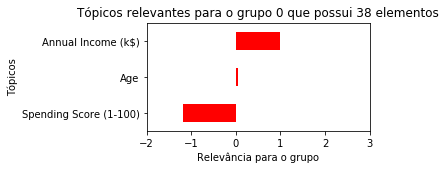

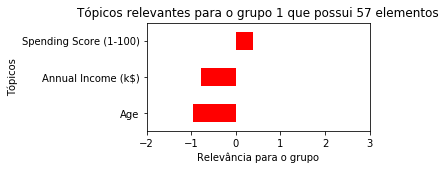

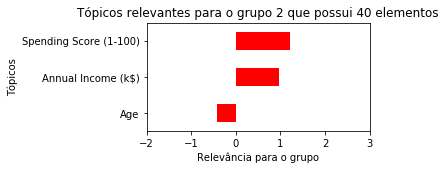

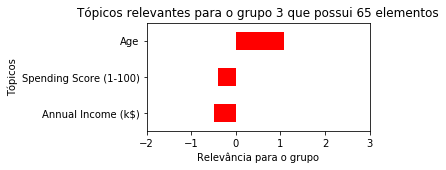

In [19]:
import collections
number = collections.Counter(k_means.labels_)
for c in range(0,centers.shape[0]):
    print_cluster_info(c, number, x_lim=(-2,3))

In [20]:
df['label'] = k_means.labels_

In [21]:
temp = dfc_sc
temp['label'] = k_means.labels_
for c in range(0,centers.shape[0]):
    print(cluster_quality(temp, centers, c))

(0, 0.9905487057550012, 0.4278076467747138)
(1, 0.9714661760540455, 0.3733983111752038)
(2, 0.700124349872959, 0.3327406436101107)
(3, 0.9949570883830533, 0.40880259321676854)


In [22]:
df['label'].value_counts()

3    65
1    57
2    40
0    38
Name: label, dtype: int64

In [23]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'label'],
      dtype='object')

**Fazer um plot 3D**

Text(0.5, 0, 'Spending Score (1-100)')

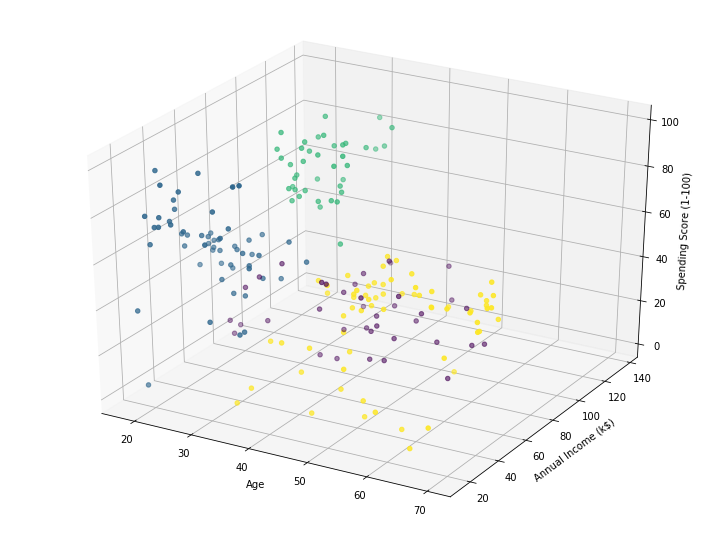

In [24]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 12.8, 9.6

ax = plt.axes(projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['label'], linewidth=1)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [27]:
df[df['label'] == 2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
122,123,Female,40,69,58,2
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2
133,134,Female,31,72,71,2
135,136,Female,29,73,88,2
137,138,Male,32,73,73,2
139,140,Female,35,74,72,2


In [28]:
df[df['label'] == 2]['Genre'].value_counts()

Female    22
Male      18
Name: Genre, dtype: int64